Student: Duncan Ferguson <br>
Student Id: 871641260 <br>
Class: Comp 4431-1 <br>
Assignment: Exercise 6 <br>
Date: 10/22/2021 <br>
Group: Name: Broken Toe <br>
Group Members: Emma Bright, Mike Santoro <br>

# Part 1

You are to write code implementing the k-means clustering algorithm assuming a 3-dimensional data set and test it.
Make your code work for 3 clusters.  (If you want you can make it work for 2-clusters first then modify for 3-clusters,
 but the data set I am providing nicely produces three clusters).

Once your code works, run it on this test file: exercise8_infile1.csv Download exercise8_infile1.csv

For output print out the number in each cluster and the list of points in each cluster.  Your output should look
something like this: exercise8_output.txt

In [737]:
import pandas as pd
import numpy as np

def Euclidean_D(point1, point2):
    """This Function Finds the distance between two 3d points"""
    dist = (((point2[0]-point1[0])**2) + ((point2[1]-point1[1])**2) + ((point2[2]-point1[2])**2))**(1/2)
    return dist

def assign_clusters(centroids, df):
    """This Assigns Clusters to closest centroid"""
    divided_clusters = {i:np.empty([0, k]) for i in range(k)}
    for row in df:
        d0 = Euclidean_D(centroids[0], row)
        d1 = Euclidean_D(centroids[1], row)
        d2 = Euclidean_D(centroids[2], row)
        if min(d0,d1,d2) == d0:
            divided_clusters[0] = np.append(divided_clusters[0], [row], axis=0)
        elif min(d0,d1,d2) == d1:
            divided_clusters[1] = np.append(divided_clusters[1], [row], axis=0)
        elif min(d0,d1,d2) == d2:
            divided_clusters[2] = np.append(divided_clusters[2], [row], axis=0)
        else:
            print("Error")
    return divided_clusters

In [738]:
# Importing Data
df = pd.read_csv("exercise8_infile1.csv")
df = df.values
k = 3  # Number of Clusters

In [739]:
# Selecting k random clusters
# np.random.seed(0)
# centroids = df[np.random.choice(df.shape[0],k, replace=False)]
centroids = np.array([[30.92971026, 30.87633269, 32.24465664],
                   [30.96752128, 27.96099865, 30.42075504],
                   [19.00357287, 19.37803004, 19.99621703]])

centroids

array([[30.92971026, 30.87633269, 32.24465664],
       [30.96752128, 27.96099865, 30.42075504],
       [19.00357287, 19.37803004, 19.99621703]])

In [740]:
# Base Case
clusters = assign_clusters(centroids, df)
for l in range(k):
    centroids[l] = np.mean(clusters[l], axis=0)

centroids

array([[30.52289151, 30.81171542, 31.68038832],
       [31.13147994, 29.02777697, 29.2985218 ],
       [15.83658959, 15.65096256, 15.90707072]])

In [741]:
iterations = 10000
for _ in range(iterations):
    clusters = assign_clusters(centroids, df)
    for l in range(k):
        centroids[l] = np.mean(clusters[l], axis=0)

print(len(clusters[0]))
print(len(clusters[1]))
print(len(clusters[2]))


14
15
71


In [756]:
cluster_df1 = pd.DataFrame(clusters[0], columns=["X","Y","Z"])
cluster_df1["Assigned_Cluster"] = ["Cluster 1" for _ in range(len(clusters[0]))]
cluster_df1

,X,Y,Z,Assigned_Cluster
0,31.410145,26.640116,33.999951,Cluster 1
1,28.401663,29.992909,31.025189,Cluster 1
2,27.725097,29.387592,31.655949,Cluster 1
3,28.441786,29.662960,31.147418,Cluster 1
4,30.561330,29.853775,32.320677,Cluster 1
5,33.474769,30.994006,32.273838,Cluster 1
6,30.403660,27.885761,31.084315,Cluster 1
7,31.181806,30.392760,30.528214,Cluster 1
8,32.210556,31.365811,34.806585,Cluster 1
9,30.527997,29.825635,30.581069,Cluster 1


In [759]:
cluster_df2 = pd.DataFrame(clusters[1], columns=["X","Y","Z"])
cluster_df2["Assigned_Cluster"] = ["Cluster 2" for _ in range(len(clusters[1]))]
cluster_df2


,X,Y,Z,Assigned_Cluster
0,32.304530,30.393287,26.909572,Cluster 2
1,29.886351,28.423790,30.135420,Cluster 2
2,29.664278,30.650115,29.576174,Cluster 2
3,31.486517,29.808968,29.388962,Cluster 2
4,31.545207,29.432985,29.854512,Cluster 2
5,30.967521,27.960999,30.420755,Cluster 2
6,29.587875,30.084311,27.190879,Cluster 2
7,33.959381,29.235469,31.050640,Cluster 2
8,26.586569,27.336097,26.478623,Cluster 2
9,27.824467,30.186301,27.536982,Cluster 2


In [760]:
cluster_df3 = pd.DataFrame(clusters[2], columns=["X","Y","Z"])
cluster_df3["Assigned_Cluster"] = ["Cluster 3" for _ in range(len(clusters[2]))]
cluster_df3

,X,Y,Z,Assigned_Cluster
0,18.900508,17.194255,23.165505,Cluster 3
1,17.909706,15.273063,22.270691,Cluster 3
2,12.924216,5.879719,9.355166,Cluster 3
3,19.231891,21.771659,21.263804,Cluster 3
4,21.459951,20.745988,21.067622,Cluster 3
...,...,...,...,...
66,23.381235,19.405075,19.494800,Cluster 3
67,13.250755,11.868889,13.227059,Cluster 3
68,20.100899,20.569959,18.770700,Cluster 3
69,20.507867,21.664456,19.598545,Cluster 3


In [764]:
cluster_centroid = pd.DataFrame(centroids, columns=["X","Y","Z"])
cluster_centroid["Assigned_Cluster"] = ["Centroid" for _ in range(len(centroids))]
cluster_centroid

,X,Y,Z,Assigned_Cluster
0,30.413562,30.096488,32.083592,Centroid
1,31.274094,29.576393,28.763408,Centroid
2,15.836590,15.650963,15.907071,Centroid


In [766]:
frames = [cluster_df1, cluster_df2, cluster_df3, cluster_centroid]
master_df = pd.concat(frames)
master_df

,X,Y,Z,Assigned_Cluster
0,31.410145,26.640116,33.999951,Cluster 1
1,28.401663,29.992909,31.025189,Cluster 1
2,27.725097,29.387592,31.655949,Cluster 1
3,28.441786,29.662960,31.147418,Cluster 1
4,30.561330,29.853775,32.320677,Cluster 1
...,...,...,...,...
69,20.507867,21.664456,19.598545,Cluster 3
70,19.394428,20.201201,21.930691,Cluster 3
0,30.413562,30.096488,32.083592,Centroid
1,31.274094,29.576393,28.763408,Centroid


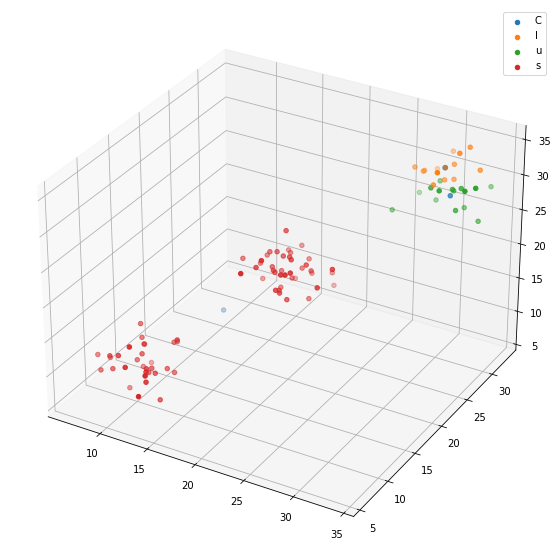

In [778]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

groups = master_df.groupby("Assigned_Cluster")
for name, group in groups:
    ax.scatter(group["X"], group["Y"], group["Z"], label=name)
    ax.legend(name)